In [12]:
%matplotlib inline
import pandas as pd

In [13]:
coffee_df = pd.read_csv("data/coffee-listings-from-all-walmart-stores.csv")
coffee_df.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [14]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1400 non-null   object 
 1   coffee_type                 1121 non-null   object 
 2   rating                      1400 non-null   float64
 3   reviews                     1400 non-null   int64  
 4   seller_name                 1400 non-null   object 
 5   thumbnail                   1400 non-null   object 
 6   price                       1400 non-null   float64
 7   weight                      1400 non-null   object 
 8   weight_formatted_to_gramms  1400 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 98.6+ KB


In [15]:
coffee_df.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.982643,440.853571,14.041343,621.391786
std,1.518037,879.351997,10.257832,369.564693
min,0.000000,0.000000,0.000000,0.000000
25%,4.300000,16.000000,7.950000,340.200000
50%,4.600000,136.000000,12.735000,567.000000
75%,4.800000,604.500000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


In [10]:
coffee_df.shape

(1400, 9)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation between variables')

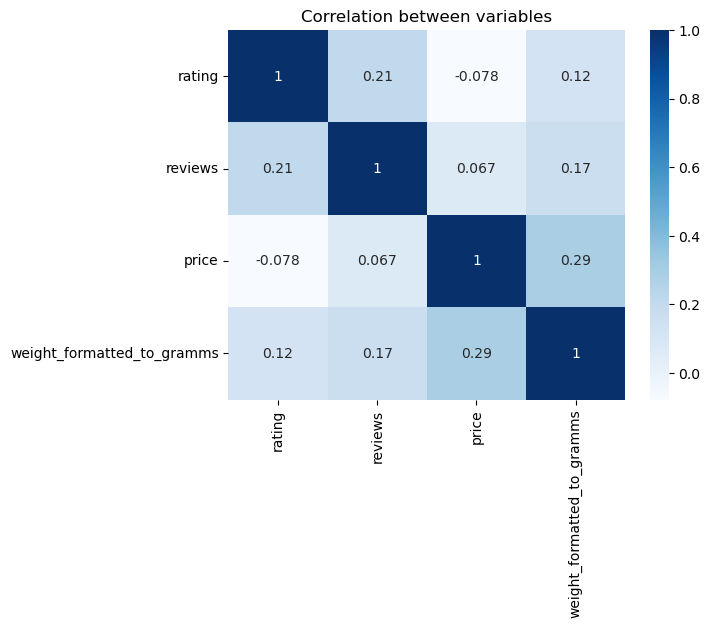

In [22]:
ax = sns.heatmap(coffee_df.corr(), annot=True, cmap="Blues")
ax.set_title('Correlation between variables')

In [26]:
# Maximum Reviews
coffee_df.query('reviews ==reviews.max()')[['title','reviews']]

,title,reviews
46,"folgers classic roast ground coffee, medium ro...",15148


In [34]:
# Most rating
coffee_df.query('rating == rating.max()')[['title','rating','reviews']].sort_values(
                by='reviews', ascending=False).style.hide(axis='index').background_gradient(cmap='Blues')

#coffee_df.query('rating == rating.max()')[['title', 'rating', 'reviews']].sort_values(
#    by='reviews', ascending=False
#).style.hide(axis='index').background_gradient(cmap='Blues')

title,rating,reviews
community coffee caf special decaf medium-dark roast coffee single-serve cups 36 ct box compatible with keurig 2.0 k-cup brewers,5.000000,108
"cameron's coffee jamaican me crazy ground coffee, light roast, 12 oz",5.000000,29
"caf bustelo ground coffee, dark roast, 6-ounce brick",5.000000,20
"vispak zlatna bosnian coffee, 35.2 oz",5.000000,11
"black rifle ready-to-drink coffee, espresso with cream, 11oz, can",5.000000,8
eldorado espresso brick 9 oz,5.000000,7
"black rifle ready-to-drink coffee, espresso mocha, 11oz, can",5.000000,6
"death wish coffee, organic, fair trade, pumpkin chai ground coffee, 12 oz, bag",5.000000,4
"death wish coffee, organic, fair-trade, espresso roast ground, 14oz, bag",5.000000,4
"kauai coffee na pali coast k-cup coffee pods, dark roast, 24 ct",5.000000,4


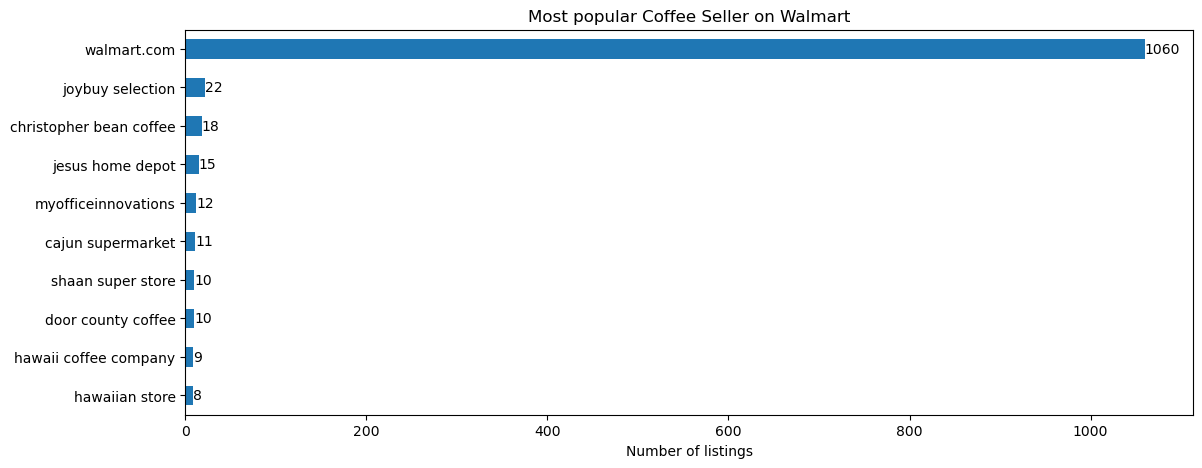

In [56]:
# Most popular seller
plt.title('Most popular Coffee Seller on Walmart')

ax = coffee_df['seller_name'].value_counts().head(10).sort_values().plot(kind='barh', figsize = (13,5))
ax.bar_label(ax.containers[0])

plt.xlabel('Number of listings')
plt.show()

In [59]:
coffee_df.head()


,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [63]:
# sum weight in grams
grams = coffee_df['weight_formatted_to_gramms'].sum()
grams, round(grams/1000)

(869948.5, 870)

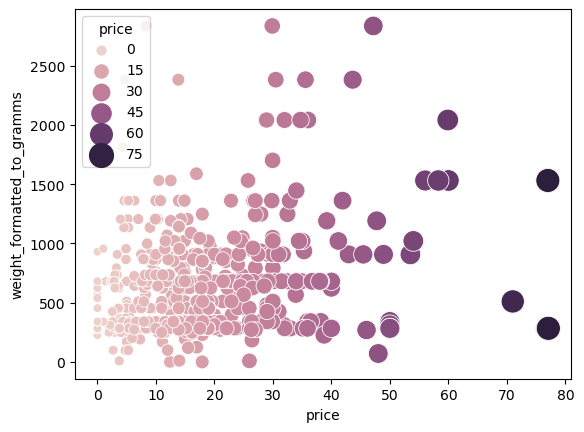

In [70]:
ax = sns.scatterplot(
    data=coffee_df,
    x='price',
    y='weight_formatted_to_gramms',
    hue='price',
    size='price',
    sizes=(40, 300),
)

sns.move_legend(ax, 'upper left') # 1 = X axis, 1.02 = Y axis of the legend.
